# Import Libraries and Data

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from sklearn.svm import SVC, SVR

In [ ]:
# Import data from my GitHub repo
cancer_url = 'https://raw.githubusercontent.com/oopCole/ECGR4105/refs/heads/main/HW4/cancer.csv'
housing_url = 'https://raw.githubusercontent.com/oopCole/ECGR4105/refs/heads/main/HW4/Housing.csv'

# Dataframes for urls
cancer_df = pd.read_csv(cancer_url)
housing_df = pd.read_csv(housing_url)

# Display first 5 rows of the DataFrame
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Code for Problem 1

## Pre-Processing

In [ ]:
# Input and output values
x = cancer_df.drop(columns=['diagnosis', 'id'])
y = cancer_df['diagnosis'].map({'M': 1, 'B': 0})  # Convert M to 1 and B to 0

x = StandardScaler().fit_transform(x)

## PCA and SVM Classification

In [ ]:
def svm_train(x, y, kernel_in, N):
    """
    Build an SVM classifier using PCA feature extraction.

    Parameters:
    x : The input data
    y : The output data
    kernel_in : The SVC kernel to use
    N : Number of principal components

    Returns:
    accuracies : An array containing accuracy values
    precisions : An array containing precision values
    recalls : An array containing recall values
    """
    accuracies = []
    precisions = []
    recalls = []

    # Initialize variables to store the best K and lowest MSE
    best_K = None
    highest_accuracy = 0

    for K in N:
      # PCA
      pca = PCA(n_components=K)
      principalDf = pd.DataFrame(data = pca.fit_transform(x))

      x_train, x_test, y_train, y_test = train_test_split(principalDf.values, y, train_size = 0.8, test_size = 0.2, random_state = 0)

      classifier = SVC(kernel=kernel_in, C=3)
      classifier.fit(x_train, y_train)

      # Predictions and confusion matrix
      y_pred = classifier.predict(x_test)
      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)

      accuracies.append(accuracy)
      precisions.append(precision)
      recalls.append(recall)

      # if K has the highest accuracy
      if accuracy > highest_accuracy:
          highest_accuracy = accuracy
          best_K = K

    return accuracies, precisions, recalls, highest_accuracy, best_K

## Linear Kernel Plotting

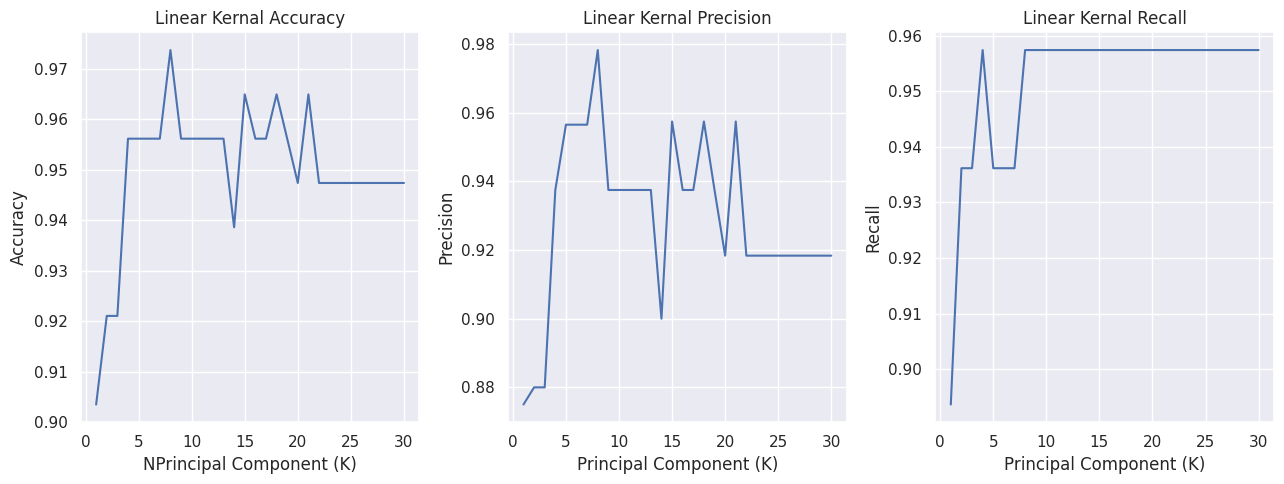

Optimum Number of K Principal Components: 8
Linear Highest Accuracy Value: 0.9736842105263158


In [ ]:
N = [i for i in range(1, 31)]

accuracy, precision, recall, highest_acc, k_val = svm_train(x, y, 'linear', N)

plt.figure(figsize=(13, 5))

# Linear plot 1
plt.subplot(1, 3, 1)
plt.plot(N, accuracy)
plt.title('Linear Kernal Accuracy')
plt.xlabel('NPrincipal Component (K)')
plt.ylabel('Accuracy')

# Linear plot 2
plt.subplot(1, 3, 2)
plt.plot(N, precision)
plt.title('Linear Kernal Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')

# Linear plot 3
plt.subplot(1, 3, 3)
plt.plot(N, recall)
plt.title('Linear Kernal Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

print(f'Optimum Number of K Principal Components: {k_val}')
print(f'Linear Highest Accuracy Value: {highest_acc}')

## RBF Kernel Plotting

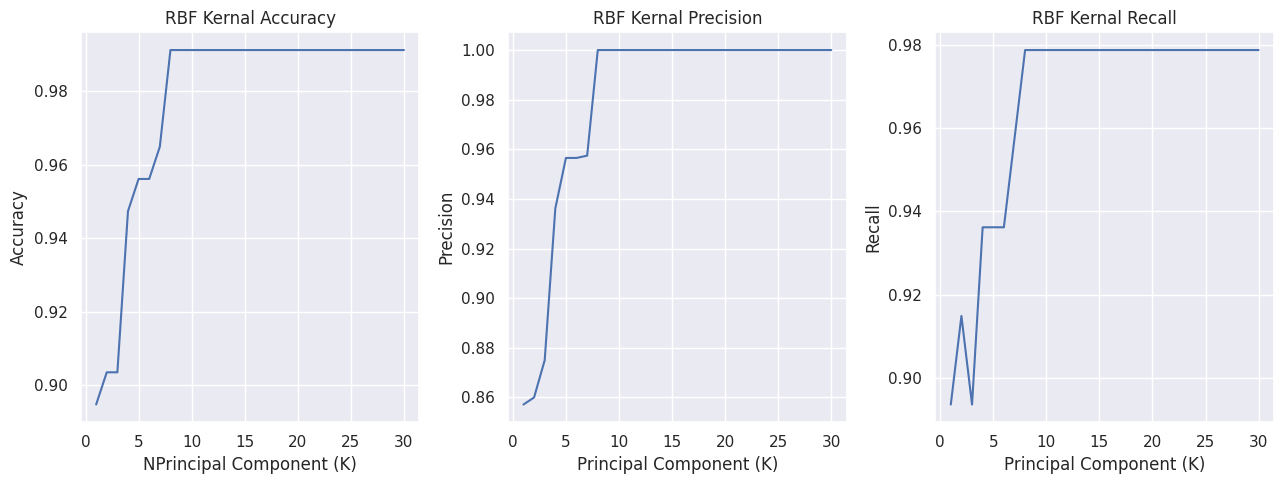

Optimum Number of K Principal Components: 8
Linear Highest Accuracy Value: 0.9912280701754386


In [ ]:
N = [i for i in range(1, 31)]

accuracy, precision, recall, highest_acc, k_val = svm_train(x, y, 'rbf', N)

plt.figure(figsize=(13, 5))

# RBF plot 1
plt.subplot(1, 3, 1)
plt.plot(N, accuracy)
plt.title('RBF Kernal Accuracy')
plt.xlabel('NPrincipal Component (K)')
plt.ylabel('Accuracy')

# RBF plot 2
plt.subplot(1, 3, 2)
plt.plot(N, precision)
plt.title('RBF Kernal Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')

# RBF plot 3
plt.subplot(1, 3, 3)
plt.plot(N, recall)
plt.title('RBF Kernal Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

print(f'Optimum Number of K Principal Components: {k_val}')
print(f'Linear Highest Accuracy Value: {highest_acc}')

## Poly Kernel Plotting

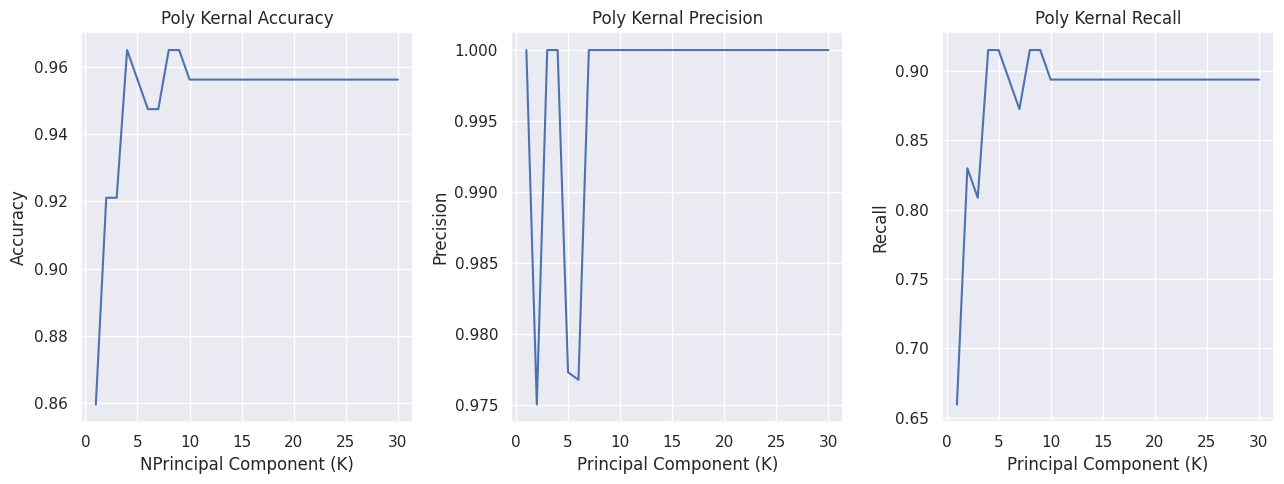

Optimum Number of K Principal Components: 4
Linear Highest Accuracy Value: 0.9649122807017544


In [ ]:
N = [i for i in range(1, 31)]

accuracy, precision, recall, highest_acc, k_val = svm_train(x, y, 'poly', N)

plt.figure(figsize=(13, 5))

# Poly plot 1
plt.subplot(1, 3, 1)
plt.plot(N, accuracy)
plt.title('Poly Kernal Accuracy')
plt.xlabel('NPrincipal Component (K)')
plt.ylabel('Accuracy')

# Poly plot 2
plt.subplot(1, 3, 2)
plt.plot(N, precision)
plt.title('Poly Kernal Precision')
plt.xlabel('Principal Component (K)')
plt.ylabel('Precision')

# Poly plot 3
plt.subplot(1, 3, 3)
plt.plot(N, recall)
plt.title('Poly Kernal Recall')
plt.xlabel('Principal Component (K)')
plt.ylabel('Recall')

plt.tight_layout()
plt.show()

print(f'Optimum Number of K Principal Components: {k_val}')
print(f'Linear Highest Accuracy Value: {highest_acc}')

## Comparing Accuracies

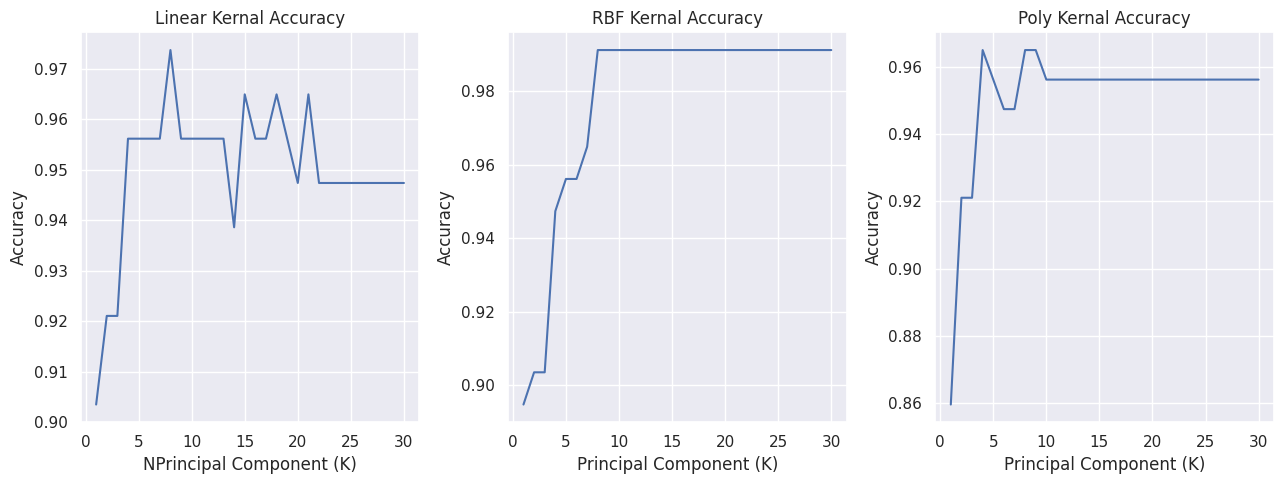

In [ ]:
N = [i for i in range(1, 31)]

lin_accuracy, lin_precision, lin_recall, highest_acc, k_val = svm_train(x, y, 'linear', N)
rbf_accuracy, rbf_precision, rbf_recall, highest_acc, k_val = svm_train(x, y, 'rbf', N)
poly_accuracy, poly_precision, poly_recall, highest_acc, k_val = svm_train(x, y, 'poly', N)

plt.figure(figsize=(13, 5))

# Plot 1
plt.subplot(1, 3, 1)
plt.plot(N, lin_accuracy)
plt.title('Linear Kernal Accuracy')
plt.xlabel('NPrincipal Component (K)')
plt.ylabel('Accuracy')

# Plot 2
plt.subplot(1, 3, 2)
plt.plot(N, rbf_accuracy)
plt.title('RBF Kernal Accuracy')
plt.xlabel('Principal Component (K)')
plt.ylabel('Accuracy')

# Plot 3
plt.subplot(1, 3, 3)
plt.plot(N, poly_accuracy)
plt.title('Poly Kernal Accuracy')
plt.xlabel('Principal Component (K)')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

# Code for Problem 2

## Pre-Processing

In [ ]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Define the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing_df[varlist] = housing_df[varlist].apply(binary_map)
housing_df = housing_df.drop('furnishingstatus', axis=1)

x = housing_df.drop('price', axis=1)
y = housing_df['price'].values.reshape(-1, 1)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size = 0.8, test_size = 0.2, random_state = 0)

## Plot Models for SVR

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


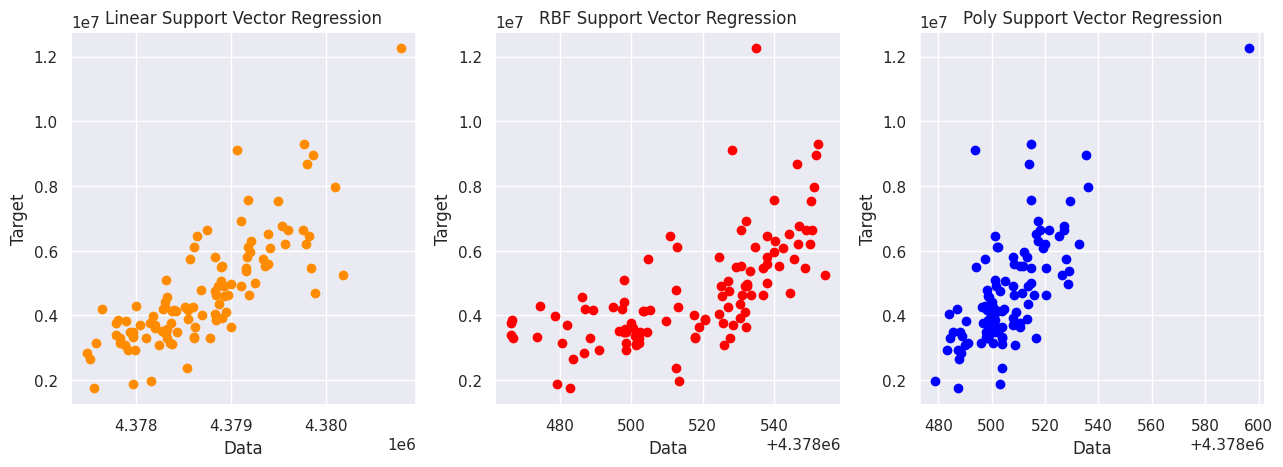

In [ ]:
# SVR models to training data
svr_rbf = SVR(kernel='rbf', C=1, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1)
svr_poly = SVR(kernel='poly', C=1, degree=2)

y_rbf = svr_rbf.fit(x_train, y_train).predict(x_test)
y_lin = svr_lin.fit(x_train, y_train).predict(x_test)
y_poly = svr_poly.fit(x_train, y_train).predict(x_test)

plt.figure(figsize=(13, 5))

# Plot 1
plt.subplot(1, 3, 1)
plt.scatter(y_lin, y_test, color='darkorange', label='test data')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Linear Support Vector Regression')

# Plot 2
plt.subplot(1, 3, 2)
plt.scatter(y_rbf, y_test, color='red', label='test data')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('RBF Support Vector Regression')

# Plot 3
plt.subplot(1, 3, 3)
plt.scatter(y_poly, y_test, color='blue', label='test data')
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Poly Support Vector Regression')

plt.tight_layout()
plt.show()

## PCA and SVR Classification

In [ ]:
def svr_train(x, y, kernel_in, N):
    """
    Build an SVR classifier using PCA feature extraction.

    Parameters:
    x : The input data
    y : The output data
    kernel_in : The SVR kernel to use
    N : Number of principal components

    Returns:
    accuracies : An array containing accuracy values
    precisions : An array containing precision values
    recalls : An array containing recall values
    """
    accuracies = []

    # Store the best K and lowest MSE
    best_K = None
    lowest_mse = float('inf')

    for K in N:
      pca = PCA(n_components=K)
      principalDf = pd.DataFrame(data = pca.fit_transform(x))

      x_train, x_test, y_train, y_test = train_test_split(principalDf.values, y, train_size = 0.8, test_size = 0.2, random_state = 0)

      classifier = SVR(kernel=kernel_in, C=1)
      classifier.fit(x_train, y_train)

      y_pred = classifier.predict(x_test)

      # Calculate MSE
      mse = mean_squared_error(y_test, y_pred)
      accuracies.append(mse)

      # if K has the lowest MSE
      if mse < lowest_mse:
          lowest_mse = mse
          best_K = K

    return accuracies, lowest_mse, best_K

## Comparing Accuracies

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

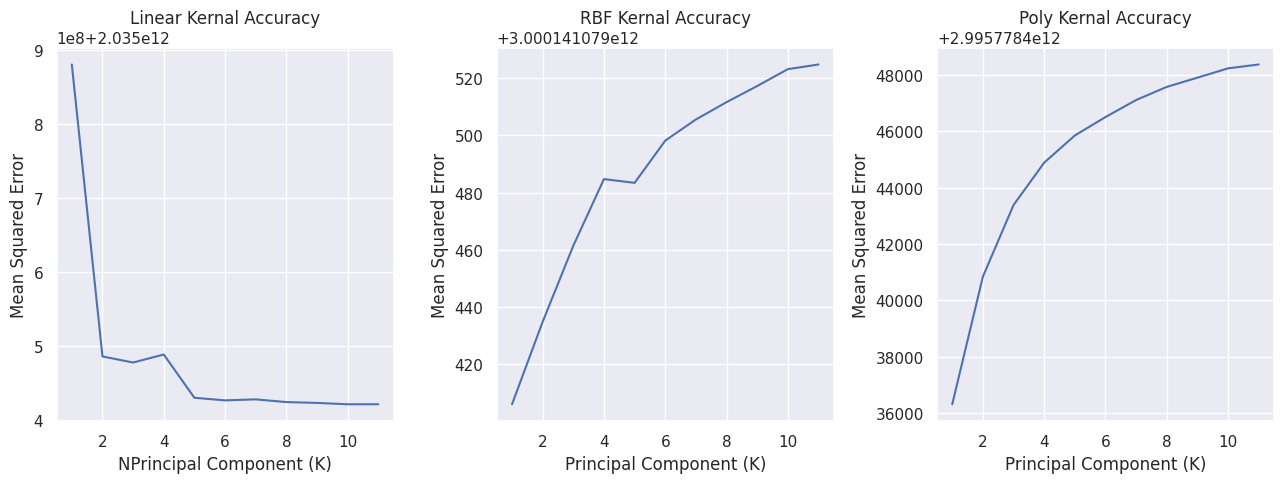

Linear Number of K Principal Components: 10
Linear Mean Squared Error Value: 2035421831509.1843
RBF Number of K Principal Components: 1
RBF Mean Squared Error Value: 3000141079406.065
Poly Number of K Principal Components: 1
Poly Mean Squared Error Value: 2995778436314.8477


In [ ]:
N = [i for i in range(1, 12)]

lin_accuracy, lin_mse, lin_K = svr_train(x, y, 'linear', N)
rbf_accuracy, rbf_mse, rbf_K = svr_train(x, y, 'rbf', N)
poly_accuracy, poly_mse, poly_K = svr_train(x, y, 'poly', N)

plt.figure(figsize=(13, 5))

# Plot 1
plt.subplot(1, 3, 1)
plt.plot(N, lin_accuracy)
plt.title('Linear Kernal Accuracy')
plt.xlabel('NPrincipal Component (K)')
plt.ylabel('Mean Squared Error')

# Plot 2
plt.subplot(1, 3, 2)
plt.plot(N, rbf_accuracy)
plt.title('RBF Kernal Accuracy')
plt.xlabel('Principal Component (K)')
plt.ylabel('Mean Squared Error')

# Plot 3
plt.subplot(1, 3, 3)
plt.plot(N, poly_accuracy)
plt.title('Poly Kernal Accuracy')
plt.xlabel('Principal Component (K)')
plt.ylabel('Mean Squared Error')

plt.tight_layout()
plt.show()

print(f'Linear Number of K Principal Components: {lin_K}')
print(f'Linear Mean Squared Error Value: {lin_mse}')
print(f'RBF Number of K Principal Components: {rbf_K}')
print(f'RBF Mean Squared Error Value: {rbf_mse}')
print(f'Poly Number of K Principal Components: {poly_K}')
print(f'Poly Mean Squared Error Value: {poly_mse}')